# Project 3: Missouri stuff

- Import modules

In [24]:
##Import modules
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
import pandas as pd
from arcgis.geometry import filters
import arcpy
from fc_to_csv import tableToCSV
import os
import matplotlib.pyplot as plt
import seaborn as sns


#Set GIS with password
gis = GIS("http://slustl.maps.arcgis.com/home", "sspiegel_slu","Apples*200")


- Get the current working directory

In [2]:
path = os.getcwd()

- Create a query to programmatically download the desired data. I didn't use spatial filter and instead did it with a query.

In [3]:
#Get URL of feature service
baseURL = "http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1/query"
#build query
where = "STATE_NAME='Missouri'"
fields = "*"

query = "?where={}&outFields={}&returnGeometry=true&f=json".format(where, fields)

fsURL = baseURL + query

fs = arcpy.FeatureSet()
fs.load(fsURL)


In [4]:
print(fsURL)

http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1/query?where=STATE_NAME='Missouri'&outFields=*&returnGeometry=true&f=json


- Create a feature class named MO_1 (This is because I screwed this up the first time and haven't deleted the original).

In [13]:
arcpy.CopyFeatures_management(fs, "D:\Advanced_Class\jupyter_stuff\Project_3\states.gdb\MO_1")

<Result 'D:\\Advanced_Class\\jupyter_stuff\\Project_3\\states.gdb\\MO_1'>

- Create a feature class variable.

In [5]:
fc = r"D:\Advanced_Class\jupyter_stuff\Project_3\states.gdb\MO_1"

- This is the feature class variable.

In [6]:
fc

'D:\\Advanced_Class\\jupyter_stuff\\Project_3\\states.gdb\\MO_1'

- I found this code online.  It writes a csv file by looping through the rows of the feature class.

In [5]:
tableToCSV(input_tbl=fc,csv_filepath=os.path.join(path,'fc.csv'))

D:\Advanced_Class\jupyter_stuff\Project_3\fc.csv CREATED


In [7]:
csv_file = os.path.join(path,'fc.csv')


- Create a dataframe from the csv file created.  

In [8]:
df = pd.read_csv(csv_file)

In [9]:
df

,OBJECTID,Shape,ID,NAME,STATE_NAME,ST_ABBREV,County_AREA,TSEGNUM,TSEGCODE,TSEGNAME,...,THHGRPL7,THHGRPL8,THHGRPL9,THHGRPL10,THHGRPL11,THHGRPL12,THHGRPL13,THHGRPL14,Shape_Length,Shape_Area
0,1,"(-10308264.687251106, 4893694.749264869)",29001,Adair County,Missouri,MO,569.508658,38,8F,Old and Newcomers,...,0,2178,0,718,414,552,0,2216,204149.339277,2.530557e+09
1,2,"(-10553313.106502375, 4863571.28260229)",29003,Andrew County,Missouri,MO,436.317612,26,6F,Heartland Communities,...,0,0,0,456,0,0,0,0,215730.130632,1.927070e+09
2,3,"(-10623346.467351057, 4928960.212424792)",29005,Atchison County,Missouri,MO,556.848560,24,6D,Prairie Living,...,0,0,0,0,0,324,0,0,222891.329535,2.491927e+09
3,4,"(-10223763.925447494, 4752637.076008475)",29007,Audrain County,Missouri,MO,696.737302,58,12C,Small Town Simplicity,...,0,537,0,0,0,2879,0,0,279993.455091,3.010309e+09
4,5,"(-10445002.351239916, 4398783.861268294)",29009,Barry County,Missouri,MO,790.957836,46,10A,Southern Satellites,...,272,0,688,5942,238,382,0,0,229804.943973,3.193721e+09
5,6,"(-10502671.393687485, 4509372.804490572)",29011,Barton County,Missouri,MO,596.747317,26,6F,Heartland Communities,...,0,0,0,327,0,261,0,0,202089.835494,2.460041e+09
6,7,"(-10501885.2019228, 4615880.530282983)",29013,Bates County,Missouri,MO,851.416977,24,6D,Prairie Living,...,0,0,0,1588,0,1468,0,0,295485.080653,3.581999e+09
7,8,"(-10384768.252404539, 4621213.766597365)",29015,Benton County,Missouri,MO,752.569499,25,6E,Rural Resort Dwellers,...,0,0,1059,977,0,530,0,0,238567.131057,3.169391e+09
8,9,"(-10021631.09142386, 4484174.531569428)",29017,Bollinger County,Missouri,MO,621.137049,47,10B,Rooted Rural,...,0,0,0,4169,0,817,0,0,238586.340424,2.548425e+09
9,10,"(-10275863.002681859, 4720395.4505066415)",29019,Boone County,Missouri,MO,691.121917,35,8C,Bright Young Professionals,...,1844,11644,1499,0,10007,1376,0,11807,286833.869574,2.967215e+09


- Use the 'mode' to find the most dominant Tapestry Life Mode Group

In [10]:
print(df.loc[:,"TLIFENAME"].mode())

0    Cozy Country Living
dtype: object


- Create bar graph.

['Middle Ground' 'Cozy Country Living' 'Hometown' 'Rustic Outposts'
 'Family Landscapes' 'GenXurban' 'Senior Styles' 'Scholars and Patriots']


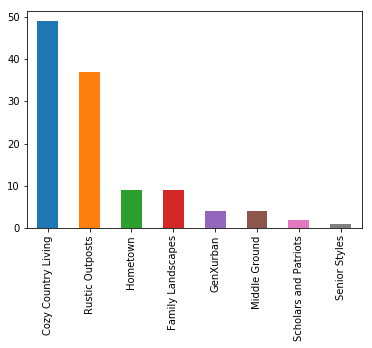

In [11]:


# path = os.getcwd()




TLIFENAME=df.TLIFENAME.unique()

print(TLIFENAME)



x = df.loc[df['TLIFENAME'] == 'Middle Ground']

tl_name = df.TLIFENAME.value_counts()

tl_name.plot.bar()


- Create pie chart.

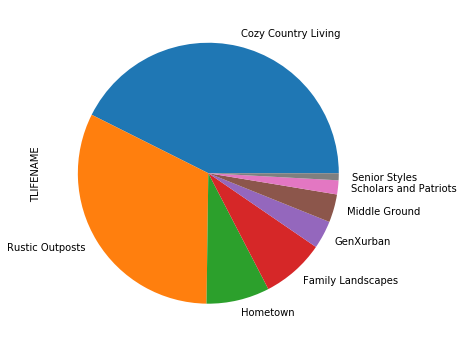

In [12]:
tl_name.plot.pie(figsize=(6, 6))

In [13]:
TSEGNAME=df.TSEGNAME.unique()

print(TSEGNAME)

#tlife_dic = {}


#x_TSEGNAME = df.loc[df['TLIFENAME'] == 'Middle Ground']

#tl_name = df.TLIFENAME.value_counts()

#tl_name.plot.hist()

['Old and Newcomers' 'Heartland Communities' 'Prairie Living'
 'Small Town Simplicity' 'Southern Satellites' 'Rural Resort Dwellers'
 'Rooted Rural' 'Bright Young Professionals' 'Traditional Living'
 'Salt of the Earth' 'Middleburg' 'Green Acres' 'Rural Bypasses'
 'Rustbelt Traditions' 'Senior Escapes' 'Midlife Constants'
 'College Towns' 'Soccer Moms' 'Family Foundations' 'Emerald City']


- Get dominant Segment Name.

In [14]:
print(df.loc[:,"TSEGNAME"].mode())

0    Rooted Rural
dtype: object


- Group values of Segment Counts.

In [15]:
ts_name = df.TSEGNAME.value_counts()

In [16]:
ts_name

Rooted Rural                  27
Prairie Living                16
Heartland Communities         16
Salt of the Earth              9
Southern Satellites            8
Middleburg                     8
Small Town Simplicity          6
Rural Resort Dwellers          4
Green Acres                    4
Traditional Living             2
Midlife Constants              2
Rural Bypasses                 2
Old and Newcomers              2
College Towns                  2
Rustbelt Traditions            2
Bright Young Professionals     1
Senior Escapes                 1
Emerald City                   1
Soccer Moms                    1
Family Foundations             1
Name: TSEGNAME, dtype: int64

- Create bar graph

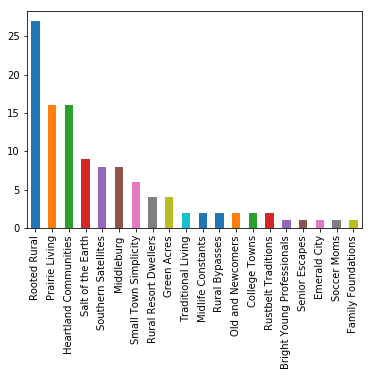

In [17]:
ts_name.plot.bar()

- Create pie graph

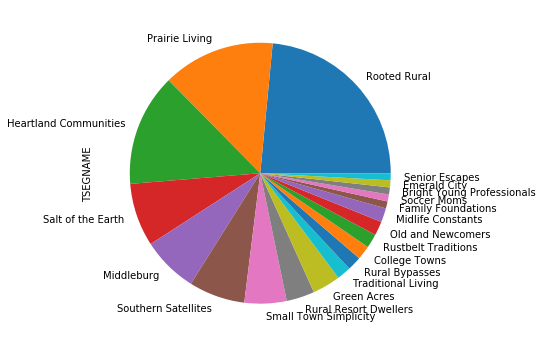

In [21]:
ts_name.plot.pie(figsize=(6, 6))

In [23]:
ts_name

Rooted Rural                  27
Prairie Living                16
Heartland Communities         16
Salt of the Earth              9
Middleburg                     8
Southern Satellites            8
Small Town Simplicity          6
Rural Resort Dwellers          4
Green Acres                    4
Traditional Living             2
Rural Bypasses                 2
College Towns                  2
Rustbelt Traditions            2
Old and Newcomers              2
Midlife Constants              2
Family Foundations             1
Soccer Moms                    1
Bright Young Professionals     1
Emerald City                   1
Senior Escapes                 1
Name: TSEGNAME, dtype: int64

In [24]:
tl_name

Cozy Country Living      49
Rustic Outposts          37
Family Landscapes         9
Hometown                  9
Middle Ground             4
GenXurban                 4
Scholars and Patriots     2
Senior Styles             1
Name: TLIFENAME, dtype: int64

In [18]:
df

,OBJECTID,Shape,ID,NAME,STATE_NAME,ST_ABBREV,County_AREA,TSEGNUM,TSEGCODE,TSEGNAME,...,THHGRPL7,THHGRPL8,THHGRPL9,THHGRPL10,THHGRPL11,THHGRPL12,THHGRPL13,THHGRPL14,Shape_Length,Shape_Area
0,1,"(-10308264.687251106, 4893694.749264869)",29001,Adair County,Missouri,MO,569.508658,38,8F,Old and Newcomers,...,0,2178,0,718,414,552,0,2216,204149.339277,2.530557e+09
1,2,"(-10553313.106502375, 4863571.28260229)",29003,Andrew County,Missouri,MO,436.317612,26,6F,Heartland Communities,...,0,0,0,456,0,0,0,0,215730.130632,1.927070e+09
2,3,"(-10623346.467351057, 4928960.212424792)",29005,Atchison County,Missouri,MO,556.848560,24,6D,Prairie Living,...,0,0,0,0,0,324,0,0,222891.329535,2.491927e+09
3,4,"(-10223763.925447494, 4752637.076008475)",29007,Audrain County,Missouri,MO,696.737302,58,12C,Small Town Simplicity,...,0,537,0,0,0,2879,0,0,279993.455091,3.010309e+09
4,5,"(-10445002.351239916, 4398783.861268294)",29009,Barry County,Missouri,MO,790.957836,46,10A,Southern Satellites,...,272,0,688,5942,238,382,0,0,229804.943973,3.193721e+09
5,6,"(-10502671.393687485, 4509372.804490572)",29011,Barton County,Missouri,MO,596.747317,26,6F,Heartland Communities,...,0,0,0,327,0,261,0,0,202089.835494,2.460041e+09
6,7,"(-10501885.2019228, 4615880.530282983)",29013,Bates County,Missouri,MO,851.416977,24,6D,Prairie Living,...,0,0,0,1588,0,1468,0,0,295485.080653,3.581999e+09
7,8,"(-10384768.252404539, 4621213.766597365)",29015,Benton County,Missouri,MO,752.569499,25,6E,Rural Resort Dwellers,...,0,0,1059,977,0,530,0,0,238567.131057,3.169391e+09
8,9,"(-10021631.09142386, 4484174.531569428)",29017,Bollinger County,Missouri,MO,621.137049,47,10B,Rooted Rural,...,0,0,0,4169,0,817,0,0,238586.340424,2.548425e+09
9,10,"(-10275863.002681859, 4720395.4505066415)",29019,Boone County,Missouri,MO,691.121917,35,8C,Bright Young Professionals,...,1844,11644,1499,0,10007,1376,0,11807,286833.869574,2.967215e+09


- Create a crosstab to see if there is a correlation between TSEGNAME and TLIFENAME

In [21]:
pd.crosstab(df.TSEGNAME,df.TLIFENAME)

TLIFENAME,Cozy Country Living,Family Landscapes,GenXurban,Hometown,Middle Ground,Rustic Outposts,Scholars and Patriots,Senior Styles
TSEGNAME,,,,,,,,
Bright Young Professionals,0,0,0,0,1,0,0,0
College Towns,0,0,0,0,0,0,2,0
Emerald City,0,0,0,0,1,0,0,0
Family Foundations,0,0,0,1,0,0,0,0
Green Acres,4,0,0,0,0,0,0,0
Heartland Communities,16,0,0,0,0,0,0,0
Middleburg,0,8,0,0,0,0,0,0
Midlife Constants,0,0,2,0,0,0,0,0
Old and Newcomers,0,0,0,0,2,0,0,0


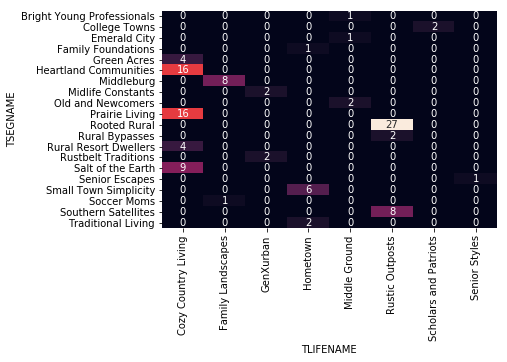

In [26]:
sns.heatmap(pd.crosstab(df.TSEGNAME, df.TLIFENAME),
             annot=True, cbar=False)